# Scientific Context

Relative humidity is a key variable in atmospheric sciences and climatology. It plays a central role in the hydrological cycle, influencing precipitation patterns, evaporation rates, and drought conditions. Accurately predicting relative humidity is essential for understanding and modeling the complex interactions between different components of the climate system, particularly in regions like Morocco, where droughts have significant socio-economic and environmental impacts.

## Why Relative Humidity?

Relative humidity is a crucial climate indicator, affecting weather patterns, soil moisture, and water availability. It directly influences drought conditions by determining the rate of evaporation and transpiration from plants and soil. Changes in relative humidity impact cloud formation, precipitation, and atmospheric stability. As a key variable in climate studies, it provides insights into regional and global changes in the hydrological cycle. Additionally, relative humidity is widely used in weather forecasting and climate models to assess the likelihood of droughts and extreme weather events.

## Why Are Other Variables Relevant for Predicting Relative Humidity?

Relative humidity results from complex interactions between numerous atmospheric factors. Here’s why the other variables in your dataset are essential for predicting relative humidity:

- **Temperature (`t`)**:  
  Temperature affects the saturation point of air, directly influencing relative humidity. Warmer air can hold more moisture, impacting humidity levels.

- **Wind (`u`, `v`)**:  
  Wind transports moisture and heat, influencing local humidity levels. Wind patterns determine moisture advection and drying effects in a region.

- **Specific Humidity (`q`)**:  
  Specific humidity measures the absolute amount of water vapor in the air and is directly linked to relative humidity.

- **Cloud Cover (`cc`)**:  
  Clouds impact the radiation balance and surface evaporation, affecting local humidity levels.

- **Vertical Velocity (`w`)**:  
  Vertical air movements influence condensation and evaporation processes, regulating relative humidity through adiabatic cooling and warming.

- **Geopotential (`z`)**:  
  Geopotential height is related to atmospheric pressure and influences moisture transport and condensation processes.

- **Ozone (`o3`)**:  
  Ozone affects atmospheric temperature and stability, indirectly impacting humidity distribution.

- **Vorticity (`pv`, `vo`)**:  
  Vorticity is an indicator of swirling air movements, which can redistribute moisture and influence humidity patterns.

- **Divergence (`d`)**:  
  Wind divergence is related to the convergence and divergence of air masses, affecting humidity by regulating moisture fluxes in the atmosphere.

## Spatio-Temporal Table Format

Your dataset follows a spatio-temporal format, meaning it contains both spatial (`latitude`, `longitude`) and temporal (`time`) information. Here’s how the data is structured:

### Dimensions:
- **Time (`valid_time`)**: 768 time steps.
- **Pressure Level (`pressure_level`)**: 1 level (likely surface).
- **Latitude (`latitude`)**: 37 latitude points.
- **Longitude (`longitude`)**: 61 longitude points.

### Variables:

#### Explanatory Variables:
- `t` (temperature)
- `u`, `v` (wind)
- `cc` (cloud cover)
- `w` (vertical velocity)
- `z` (geopotential)
- `o3` (ozone)
- `pv`, `vo` (vorticity)
- `d` (divergence)

#### Target Variable:
- `r` (relative humidity)

### Table Structure:
Each row in the table represents an observation at a given time, at a given pressure level, and at a specific geographic position (`latitude`, `longitude`). The columns contain the values of the different variables.


In [2]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

### Description du format des données : 
- number a une dimension vide (), ce qui signifie que c'est une variable scalaire (une seule valeur).
- valid_time a une dimension (968,), ce qui correspond probablement à 968 pas de temps.
- pressure_level a une dimension (1,), ce qui signifie qu'il n'y a qu'un seul niveau de pression.
- latitude et longitude ont des dimensions (59,) et (21,), respectivement, ce qui correspond à une grille de 59x21 points.
- Les autres variables (comme d, cc, z, etc.) ont des dimensions (968, 1, 59, 21), ce qui correspond à :
  - 968 pas de temps, (`every 4 days, all mounth from 2015 until 2025 at 12am`)
  - 1 niveau de pression,
  - 59 latitudes,
  - 21 longitudes.

In [ ]:
file_path = '2bbe60bf96420722093e2036e05d4a6e.nc'
dataset = nc.Dataset(file_path)

#  dimensions
valid_time = dataset.variables['valid_time'][:]  # (768,)
pressure_level = dataset.variables['pressure_level'][:]  # (1,)
latitude = dataset.variables['latitude'][:]  # (37,)
longitude = dataset.variables['longitude'][:]  # (61,)

variables = {
    'valid_time': valid_time,  # Time steps (968,)
    'pressure_level': pressure_level,  # Pressure levels (1,)
    'latitude': latitude,  # Latitude coordinates (59,)
    'longitude': longitude,  # Longitude coordinates (21,)
    'expver': dataset.variables['expver'][:],  # Experiment version (968,)
    'd': dataset.variables['d'][:],  # Divergence (968, 1, 59, 21)
    'cc': dataset.variables['cc'][:],  # Cloud cover fraction (968, 1, 59, 21)
    'z': dataset.variables['z'][:],  # Geopotential (968, 1, 59, 21)
    'o3': dataset.variables['o3'][:],  # Ozone mass mixing ratio (968, 1, 59, 21)
    'pv': dataset.variables['pv'][:],  # Potential vorticity (968, 1, 59, 21)
    'r': dataset.variables['r'][:],  # Relative humidity (968, 1, 59, 21)
    'ciwc': dataset.variables['ciwc'][:],  # Specific cloud ice water content (968, 1, 59, 21)
    'clwc': dataset.variables['clwc'][:],  # Specific cloud liquid water content (968, 1, 59, 21)
    'q': dataset.variables['q'][:],  # Specific humidity (968, 1, 59, 21)
    'crwc': dataset.variables['crwc'][:],  # Specific rain water content (968, 1, 59, 21)
    'cswc': dataset.variables['cswc'][:],  # Specific snow water content (968, 1, 59, 21)
    't': dataset.variables['t'][:],  # Temperature (968, 1, 59, 21)
    'u': dataset.variables['u'][:],  # U-component of wind (968, 1, 59, 21)
    'v': dataset.variables['v'][:],  # V-component of wind (968, 1, 59, 21)
    'w': dataset.variables['w'][:],  # Vertical velocity (968, 1, 59, 21)
    'vo': dataset.variables['vo'][:]  # Relative vorticity (968, 1, 59, 21)
}
dataset.close()


time_grid, level_grid, lat_grid, lon_grid = np.meshgrid(
    valid_time, pressure_level, latitude, longitude, indexing='ij'
)

data = {
    'valid_time': time_grid.flatten(),
    'pressure_level': level_grid.flatten(),
    'latitude': lat_grid.flatten(),
    'longitude': lon_grid.flatten()
}

for var_name, var_data in variables.items():
    if var_name not in ['valid_time', 'pressure_level', 'latitude', 'longitude']:
        if var_data.shape == (968, 1, 59, 21):
            data[var_name] = var_data.flatten()
        elif var_name == 'expver':
            data[var_name] = np.repeat(var_data, 1 * 59 * 21)
        else:
            print(f"Attention : la variable {var_name} a une forme inattendue : {var_data.shape}")



df = pd.DataFrame(data)
df


,valid_time,pressure_level,latitude,longitude,expver,d,cc,z,o3,pv,...,ciwc,clwc,q,crwc,cswc,t,u,v,w,vo
0,1420113600,1000.0,35.92,27.66,0001,-0.000047,0.0,841.522949,8.761356e-08,-3.002679e-07,...,0.0,0.0,0.005091,1.529406e-06,0.0,285.873535,5.082061,6.469443,-0.133287,0.000119
1,1420113600,1000.0,35.92,27.91,0001,-0.000075,0.0,875.710449,8.728705e-08,-1.871122e-07,...,0.0,0.0,0.004910,8.108909e-07,0.0,286.001465,4.135772,7.509971,-0.191987,0.000104
2,1420113600,1000.0,35.92,28.16,0001,-0.000034,0.0,919.179199,8.740619e-08,-8.507413e-08,...,0.0,0.0,0.005065,5.746260e-07,0.0,285.732910,4.059112,8.517295,-0.059236,0.000126
3,1420113600,1000.0,35.92,28.41,0001,-0.000014,0.0,955.116699,8.751488e-08,-7.075505e-08,...,0.0,0.0,0.005287,5.364418e-07,0.0,285.541992,4.028838,9.248252,0.016661,0.000063
4,1420113600,1000.0,35.92,28.66,0001,-0.000039,0.0,986.241699,8.761629e-08,-7.669223e-08,...,0.0,0.0,0.005419,3.348105e-07,0.0,285.516602,3.906768,9.066123,-0.065751,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199347,1740484800,1000.0,21.42,31.66,0005,0.000003,0.0,1301.597412,8.923507e-08,-5.242455e-07,...,0.0,0.0,0.002596,0.000000e+00,0.0,296.969482,-2.605091,-5.069801,-0.038906,0.000012
1199348,1740484800,1000.0,21.42,31.91,0005,-0.000005,0.0,1289.706787,8.916186e-08,-4.712765e-07,...,0.0,0.0,0.002527,0.000000e+00,0.0,297.212158,-2.647572,-4.858131,0.020573,0.000012
1199349,1740484800,1000.0,21.42,32.16,0005,-0.000009,0.0,1284.269287,8.902816e-08,-5.522434e-07,...,0.0,0.0,0.002507,0.000000e+00,0.0,297.275146,-2.928089,-4.782692,0.061177,0.000010
1199350,1740484800,1000.0,21.42,32.41,0005,-0.000001,0.0,1282.019287,8.889765e-08,-4.482845e-07,...,0.0,0.0,0.002545,0.000000e+00,0.0,297.136475,-3.166859,-4.855202,0.036564,-0.000004


#### **Supression de la seconde variable d'humidité** : 

In [6]:
df.drop(columns=['q'], inplace=True)

#### **Affichage de l'évolution du niveau d'humidité pour une localisation**

In [7]:

temperature_mean = df.groupby('valid_time')['t'].mean().reset_index()

In [8]:
# Utiliser uniquement la première ligne de chaque valid_time
temperature_first_location = df.drop_duplicates(subset='valid_time', keep='first')[['valid_time', 't']].reset_index(drop=True)

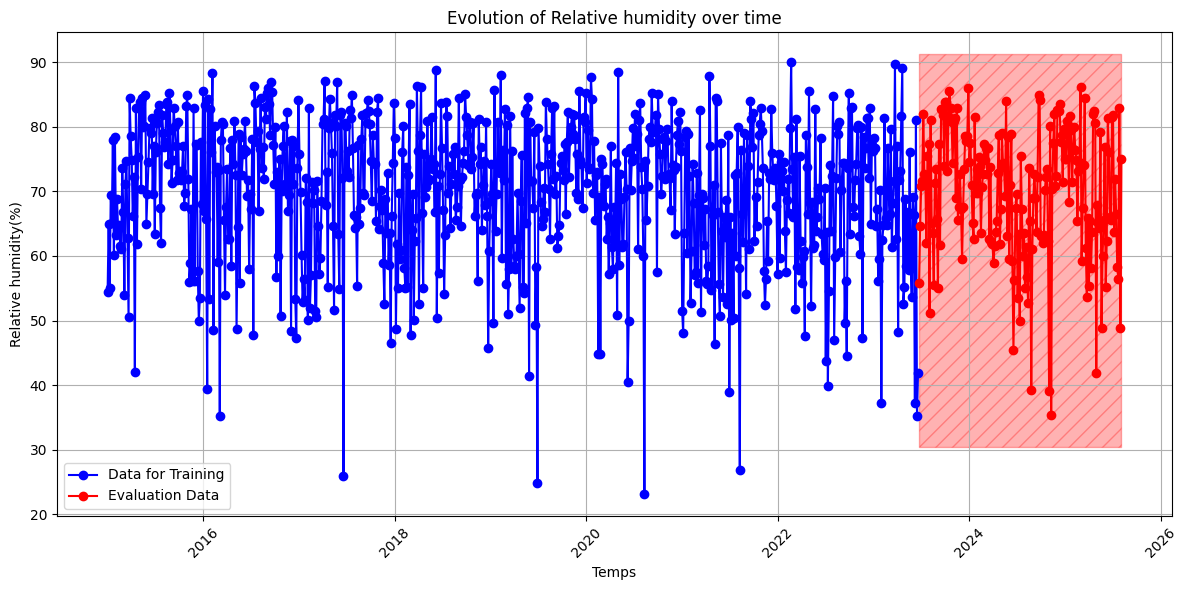

In [9]:
# Two parts Taraing and Evaluation: 
temperature_first_location = df.drop_duplicates(subset='valid_time', keep='first')[['valid_time', 'r']].reset_index(drop=True)

num_measurements = len(temperature_first_location)
date_range = pd.date_range(start='2015-01-01', periods=num_measurements, freq='4D')

temperature_first_location['valid_time'] = date_range

split_index = int(len(temperature_first_location) * 0.8)
train_data = temperature_first_location.iloc[:split_index]
eval_data = temperature_first_location.iloc[split_index:]

plt.figure(figsize=(12, 6))

plt.fill_between(eval_data['valid_time'], eval_data['r'].min()-5, eval_data['r'].max()+5, color='red', alpha=0.3, hatch='//')
plt.plot(train_data['valid_time'], train_data['r'], marker='o', linestyle='-', color='b', label='Data for Training')
plt.plot(eval_data['valid_time'], eval_data['r'], marker='o', linestyle='-', color='r', label='Evaluation Data')

plt.title('Evolution of Relative humidity over time')
plt.xlabel('Temps')
plt.ylabel('Relative humidity(%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

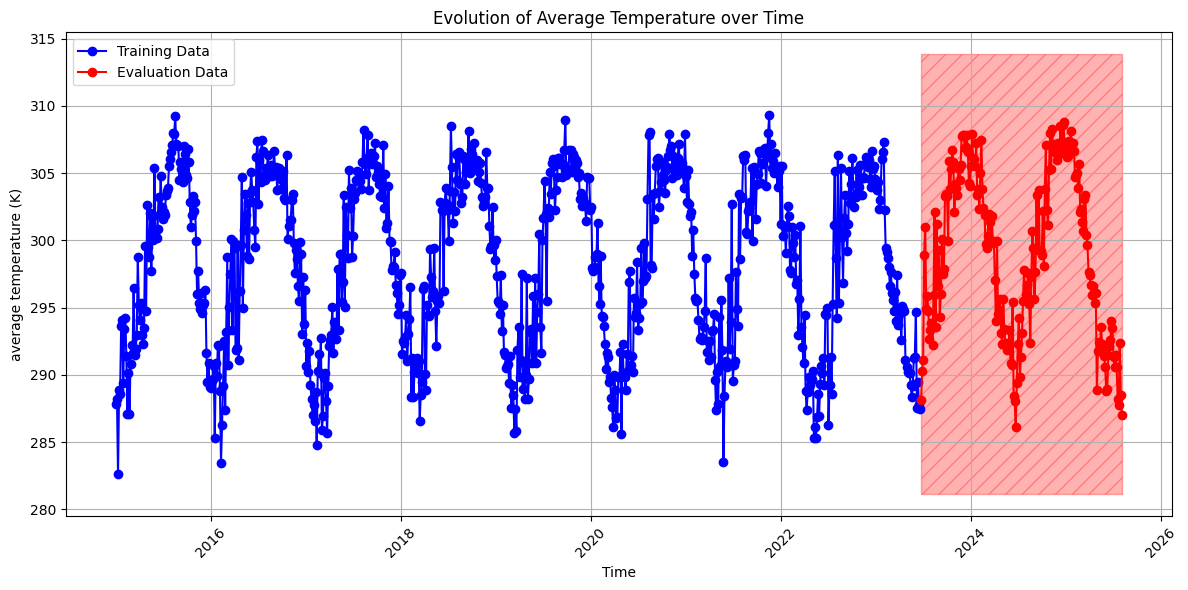

In [12]:
# série de dates correspondant au nombre de mesures de température
num_measurements = len(temperature_mean)
date_range = pd.date_range(start='2015-01-01', periods=num_measurements, freq='4D')

temperature_mean['valid_time'] = date_range

split_index = int(len(temperature_mean) * 0.8)
train_data = temperature_mean.iloc[:split_index]
eval_data = temperature_mean.iloc[split_index:]

plt.figure(figsize=(12, 6))

plt.fill_between(eval_data['valid_time'], eval_data['t'].min()-5, eval_data['t'].max()+5, color='red', alpha=0.3, hatch='//')

plt.plot(train_data['valid_time'], train_data['t'], marker='o', linestyle='-', color='b', label='Training Data')
plt.plot(eval_data['valid_time'], eval_data['t'], marker='o', linestyle='-', color='r', label='Evaluation Data')

plt.title('Evolution of Average Temperature over Time') 
plt.xlabel('Time')
plt.ylabel('average temperature (K)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The temperatures range from -13.15 °C to 3.85 °C. These temperatures seem quite low for normal conditions at sea level in Morocco. However, at an altitude corresponding to a pressure of 550 hPa, these temperatures can be more realistic.

A pressure of 1000 hPa corresponds to an altitude of about  meters above sea level. At this altitude, temperatures are generally much lower than those observed at sea level. Here is an approximation of typical temperatures at this altitude:

In winter, temperatures can drop well below 0 °C, often reaching -20 °C or lower.
In summer, temperatures can be more moderate, but they often remain below 0 °C, sometimes reaching a few degrees above zero.
Therefore, temperatures of -13.15 °C, -3.15 °C, and 3.85 °C at an altitude corresponding to a pressure of 550 hPa are quite plausible for Morocco, especially in mountainous regions like the Atlas.

### **Extraction of the database on csv format :**

In [45]:
df

,valid_time,pressure_level,latitude,longitude,expver,d,cc,z,o3,pv,r,ciwc,clwc,crwc,cswc,t,u,v,w,vo
0,1420113600,1000.0,35.92,27.66,0001,-0.000047,0.0,841.522949,8.761356e-08,-3.002679e-07,54.353184,0.0,0.0,1.529406e-06,0.0,285.873535,5.082061,6.469443,-0.133287,0.000119
1,1420113600,1000.0,35.92,27.91,0001,-0.000075,0.0,875.710449,8.728705e-08,-1.871122e-07,52.058262,0.0,0.0,8.108909e-07,0.0,286.001465,4.135772,7.509971,-0.191987,0.000104
2,1420113600,1000.0,35.92,28.16,0001,-0.000034,0.0,919.179199,8.740619e-08,-8.507413e-08,55.398106,0.0,0.0,5.746260e-07,0.0,285.732910,4.059112,8.517295,-0.059236,0.000126
3,1420113600,1000.0,35.92,28.41,0001,-0.000014,0.0,955.116699,8.751488e-08,-7.075505e-08,58.884434,0.0,0.0,5.364418e-07,0.0,285.541992,4.028838,9.248252,0.016661,0.000063
4,1420113600,1000.0,35.92,28.66,0001,-0.000039,0.0,986.241699,8.761629e-08,-7.669223e-08,61.032871,0.0,0.0,3.348105e-07,0.0,285.516602,3.906768,9.066123,-0.065751,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199347,1740484800,1000.0,21.42,31.66,0005,0.000003,0.0,1301.597412,8.923507e-08,-5.242455e-07,14.071695,0.0,0.0,0.000000e+00,0.0,296.969482,-2.605091,-5.069801,-0.038906,0.000012
1199348,1740484800,1000.0,21.42,31.91,0005,-0.000005,0.0,1289.706787,8.916186e-08,-4.712765e-07,13.729898,0.0,0.0,0.000000e+00,0.0,297.212158,-2.647572,-4.858131,0.020573,0.000012
1199349,1740484800,1000.0,21.42,32.16,0005,-0.000009,0.0,1284.269287,8.902816e-08,-5.522434e-07,13.884195,0.0,0.0,0.000000e+00,0.0,297.275146,-2.928089,-4.782692,0.061177,0.000010
1199350,1740484800,1000.0,21.42,32.41,0005,-0.000001,0.0,1282.019287,8.889765e-08,-4.482845e-07,14.370523,0.0,0.0,0.000000e+00,0.0,297.136475,-3.166859,-4.855202,0.036564,-0.000004


In [ ]:
# Nombre de lignes par fichier CSV
chunk_size = 100000  

for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df_chunk = df.iloc[chunk:chunk + chunk_size] 
    output_file = f'df_part_{i + 1}.csv'  # Nom du fichier de sortie
    df_chunk.to_csv(output_file, index=False)  
    print(f'Saved {output_file} with {len(df_chunk)} rows')

print("Tous les fichiers CSV ont été sauvegardés.")